In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.integrate import ode, solve_ivp
from scipy.optimize import fsolve
import random
import sympy as sp
from numpy.linalg import eigvals

In [ ]:
def sisd_ode(t, init, params):
    # Initital fractions
    S, I1, I2, I3, D = init
    # Parameters
    gamma, beta1, beta2, beta3, mu, delta = params

    one_two = mu
    two_three = mu

    # ODEs
    dS = -S*(beta1*I1 + beta2*I2 + beta3*I3) + gamma*(I1 + I2 + I3)
    dI1 = S*beta1*I1 - gamma*I1 - delta*I1 - I1*one_two - beta2*I1*I2 - beta3*I1*I3
    dI2 = S*beta2*I2 - gamma*I2 - delta*I2 - two_three*I2 + one_two*I1 + beta2*I1*I2 - beta3*I2*I3
    dI3 = S*beta3*I3 - gamma*I3 - delta*I3 + two_three*I2 + beta3*I1*I3 + beta3*I2*I3
    dD = delta*(I1 + I2 + I3)

    return [dS, dI1, dI2, dI3, dD]

In [4]:
init = [0.95, 0.05, 0, 0, 0]
params = [0.05, 0.115, 0.12937500000000002, 0.14375000000000002, 5e-5, 1e-4]
T = 2000
times = list(range(T))
runs = 100

(100, 5, 2000)
(5, 2000)


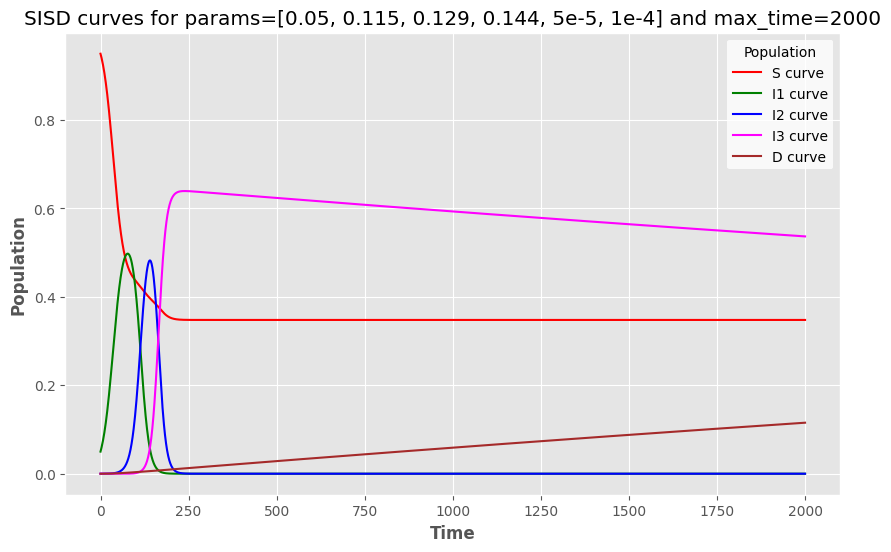

CPU times: user 752 ms, sys: 21.7 ms, total: 773 ms
Wall time: 1.62 s


In [15]:
%%time
import matplotlib.pyplot as plt

def solve_sys(init, params, times, runs):

    agg = []
    for i in range(runs):
        # Numerically solve the IVP
        sir_sol = solve_ivp(fun=lambda t, y: sisd_ode(t, y, params), t_span=[min(times),max(times)], y0=init, t_eval=times, method="RK45")
        agg.append(sir_sol["y"])
    # Average the results
    agg = np.array(agg)
    print(agg.shape)
    agg = np.mean(agg, axis=0)
    print(agg.shape)

    return agg

agg = solve_sys(init, params, times, runs)

# Plot the curves
plt.style.use("ggplot")
plt.figure(figsize=(10,6))
sline = plt.plot(times, list(agg[0]),color="red",label="S curve") # S line
iline1 = plt.plot(times, list(agg[1]),color="green",label="I1 curve") # I1 line
iline2 = plt.plot(times, list(agg[2]),color="blue",label="I2 curve") # I2 line
iline3 = plt.plot(times, list(agg[3]),color="magenta",label="I3 curve") # I3 line
dline = plt.plot(times, list(agg[4]),color="brown",label="D curve") # D line
plt.xlabel("Time",fontweight="bold")
plt.ylabel("Population",fontweight="bold")
plt.title(f"SISD curves for params=[{str(params[0])}, {str(params[1])}, {str(round(params[2],3))}, {str(round(params[3],3))}, 5e-5, 1e-4] and max_time={int(T)}")
legend = plt.legend(title="Population",loc="best")
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)
plt.savefig("results_final/SISD_ODE.png")
plt.show()

In [ ]:
def fixed_points(params):
    gamma, beta1, beta2, beta3, mu, delta = params

    def equations(vars):
        S, I1, I2, I3, D = vars
        one_two = mu * (random.random() <= mu)
        two_three = mu * (random.random() <= mu)
        one_three = mu * (random.random() <= mu)

        eq1 = -S * (beta1 * I1 + beta2 * I2 + beta3 * I3) + gamma * (I1 + I2 + I3)
        eq2 = S * beta1 * I1 - gamma * I1 - delta * I1 - I1 * (one_two + one_three) - beta2 * I1 * I2 - beta3 * I1 * I3
        eq3 = S * beta2 * I2 - gamma * I2 - delta * I2 - two_three * I2 + one_two * I1 + beta2 * I1 * I2 - beta3 * I2 * I3
        eq4 = S * beta3 * I3 - gamma * I3 - delta * I3 + one_three * I1 + two_three * I2 + beta3 * I1 * I3 + beta3 * I2 * I3
        eq5 = delta * (I1 + I2 + I3)

        return [eq1, eq2, eq3, eq4, eq5]

    S0, I10, I20, I30, D0 = 0.95, 0.05, 0, 0, 0
    fixed_point = fsolve(equations, (S0, I10, I20, I30, D0))
    return fixed_point

fixed_point = fixed_points(params)
print(f"Fixed points: S={fixed_point[0]}, I1={fixed_point[1]}, I2={fixed_point[2]}, I3={fixed_point[3]}, D={fixed_point[4]}")

Fixed points: S=0.8548320755391818, I1=-2.014735200352167e-13, I2=-3.843330832481321e-13, I3=5.85806605095527e-13, D=0.7882284936676525


In [ ]:
# Define the variables
S, I1, I2, I3, D = sp.symbols('S I1 I2 I3 D')
gamma, beta1, beta2, beta3, mu, delta = params

In [ ]:
# Define the ODEs
dS = -S*(beta1*I1 + beta2*I2 + beta3*I3) + gamma*(I1 + I2 + I3)
dI1 = S*beta1*I1 - gamma*I1 - delta*I1 - I1*(mu + mu) - beta2*I1*I2 - beta3*I1*I3
dI2 = S*beta2*I2 - gamma*I2 - delta*I2 - mu*I2 + mu*I1 + beta2*I1*I2 - beta3*I2*I3
dI3 = S*beta3*I3 - gamma*I3 - delta*I3 + mu*I1 + mu*I2 + beta3*I1*I3 + beta3*I2*I3
dD = delta*(I1 + I2 + I3)

# Define the system of equations
equations = [dS, dI1, dI2, dI3, dD]

In [ ]:
# Compute the Jacobian matrix
jacobian_matrix = sp.Matrix(equations).jacobian([S, I1, I2, I3, D])

In [ ]:
# Substitute the fixed point values into the Jacobian matrix
fixed_point_values = {S: fixed_point[0], I1: fixed_point[1], I2: fixed_point[2], I3: fixed_point[3], D: fixed_point[4]}
jacobian_at_fixed_point = jacobian_matrix.subs(fixed_point_values)

In [ ]:
# Convert the Jacobian matrix to a numerical array
jacobian_numerical = np.array(jacobian_at_fixed_point).astype(np.float64)
print(jacobian_numerical)

[[ 2.46173569e-16 -1.96031881e-02 -2.83035866e-02 -2.98015941e-01
   0.00000000e+00]
 [ 1.16715473e-16  1.94031881e-02 -1.31304907e-16 -5.83577367e-16
   0.00000000e+00]
 [-6.40708058e-17  5.00000000e-05  2.81535866e-02  2.84759137e-16
   0.00000000e+00]
 [-2.98818237e-16  5.00000000e-05  5.00000000e-05  2.97915941e-01
   0.00000000e+00]
 [ 0.00000000e+00  1.00000000e-04  1.00000000e-04  1.00000000e-04
   0.00000000e+00]]


In [ ]:
eigenvalues = eigvals(jacobian_numerical)
print(list(eigenvalues))

[np.float64(0.0), np.float64(0.29791594066346866), np.float64(0.019403188132693865), np.float64(0.02815358664928082), np.float64(2.7251755359156284e-19)]


## Network properties

In [2]:
nw = "Real_world_data/hospital_network.txt"
G = nx.read_edgelist(nw, nodetype=int)

# Map the nodes to integers
mapping = {node: i for i, node in enumerate(G.nodes)}
G = nx.relabel_nodes(G, mapping)

len(G.nodes), len(G.edges), nx.transitivity(G), np.mean(list(dict(G.degree()).values())), np.mean([x**2 for x in list(dict(G.degree()).values())]), np.var(list(dict(G.degree()).values()))

(788,
 118291,
 0.5006637263008195,
 np.float64(300.2309644670051),
 np.float64(100805.69796954315),
 np.float64(10667.065944755084))

In [3]:
nw = "Real_world_data/Oregon_router_networks/nw9_May_26.txt"
G = nx.read_edgelist(nw, nodetype=int)

# Map the nodes to integers
mapping = {node: i for i, node in enumerate(G.nodes)}
G = nx.relabel_nodes(G, mapping)

len(G.nodes), len(G.edges), nx.transitivity(G), np.mean(list(dict(G.degree()).values())), np.mean([x**2 for x in list(dict(G.degree()).values())]), np.var(list(dict(G.degree()).values()))

(11174,
 23409,
 0.009635567225768079,
 np.float64(4.189905136925004),
 np.float64(1112.821908000716),
 np.float64(1095.2666029442858))

In [8]:
import os
path = "data/networks"
files = os.listdir(path)
for nw in files:
    G1 = nx.read_edgelist(f"{path}/{nw}", nodetype=int)

    # Map the nodes to integers
    mapping = {node: i for i, node in enumerate(G1.nodes)}
    G1 = nx.relabel_nodes(G1, mapping)

    print(nw)
    print(len(G1.nodes), len(G1.edges), nx.transitivity(G1), np.mean(list(dict(G1.degree()).values())), np.mean([x**2 for x in list(dict(G1.degree()).values())]), np.var(list(dict(G1.degree()).values())))

hetero_cc_0.05.txt
1000 2000 0.05306603773584906 4.0 17.568 1.568
hetero_cc_0.34.txt
1000 2000 0.3423306933893648 4.0 16.374 0.374
hetero_cc_0.49.txt
1000 2000 0.4873628200864649 4.0 16.028 0.028
hetero_deg_var_30.35.txt
1000 1982 0.011972633979475485 3.964 46.06 30.346704000000006
hetero_deg_var_4.46.txt
1000 2048 0.056002800140007 4.096 21.238 4.460783999999999
hetero_deg_var_8.76.txt
1000 1949 0.039784624588692794 3.898 23.956 8.761596
homog_comp.txt
1000 499500 1.0 999.0 998001.0 0.0
homog_regular.txt
1000 2000 0.0005 4.0 16.0 0.0
influence_nw.txt
4119 9906 0.01433727017133271 4.809905316824472 192.36319495023065 169.22800579341427
test.txt
4 5 0.75 2.5 6.5 0.25
